In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
!pwd

/c/data/jasmin/jasminblog/content/downloads/notebooks


# Reinsurance Historical Data Analysis using Python

In [ ]:
<!-- PELICAN_BEGIN_SUMMARY -->
Goal: Use Python to automaticlly load and analyze data
<!-- PELICAN_END_SUMMARY -->

In [ ]:
Specifically, I plan to use Python to:
    - Creat a historical reinsurance dataframe from excel
    - Caluclate key ratios in the dataframe 
    - Visualize the dataframe with time series graph
    - Automatically load new data into dataframe
The sample data file is:
    - 10 Years of historical reinsurance treaties ceded premium and loss data    

<br>**Historical reinsurance treaties ceded premium and loss from 2009-2018 in Excel**<br>- Python Pandas to Read Excel Files

In [9]:
## Import pandas to read Excel, head(3) to show the first 3 rows only, shape to show how many rows/columns
df = pd.read_excel('data/ReinDashBoard/ReinTable.xlsx')
df.head(2)
df.tail(2)
df.shape

,Year,Treaty Year,Active,Contract,Subject Premium Base,Ceded Premium,Reinstatment Premium accrued,Reinstatment Premium Paid,Ultimate - Indemnity,Ultimate -ALAE,...,Paid -CY - ALAE,ITD -Paid -Indemnity,ITD -Paid -ALAE,Case Recoverable - Indemnity,Case Recoverable -ALAE,Ceded IBNR - Indemnity,Ceded IBNR - ALAE,Benefit/ (Cost),Ceded Loss Ratio - Accrued,Ceded Loss Ratio - Cash
0,2018,1982.0,Inactive,First Excess,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,2018,1983.0,Inactive,First Excess,NaN,NaN,NaN,NaN,1862238.0,372757.0,...,NaN,1862238.0,372757.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN


,Year,Treaty Year,Active,Contract,Subject Premium Base,Ceded Premium,Reinstatment Premium accrued,Reinstatment Premium Paid,Ultimate - Indemnity,Ultimate -ALAE,...,Paid -CY - ALAE,ITD -Paid -Indemnity,ITD -Paid -ALAE,Case Recoverable - Indemnity,Case Recoverable -ALAE,Ceded IBNR - Indemnity,Ceded IBNR - ALAE,Benefit/ (Cost),Ceded Loss Ratio - Accrued,Ceded Loss Ratio - Cash
704,2009,2018.0,NaN,Per Risk Excess,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705,2009,NaN,NaN,Commutation Adjustment - Excess,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(706, 24)

<br>**Formate Dataframe**<br>- Clean up formate

In [5]:
## clean up treaty year
df['Treaty Year'] = df[df['Treaty Year'].notnull()]['Treaty Year'].astype(int).astype(str)

## ref: https://stackoverflow.com/questions/50663700/convert-year-and-month-name-into-datetime-column-for-pandas-dataframe
# df['date'] = pd.to_datetime(df_sub['year'].astype(str)  + df_sub['Months'], format='%Y%B')
df['date'] = pd.to_datetime(df['Year'].astype(str), format='%Y')

## add derived/calculated columns

## ref: https://stackoverflow.com/questions/24386638/pandas-sum-two-columns-skipping-nan/24386746
df["Ceded Premium Paid"] = df["Ceded Premium"].fillna(0) + df["Reinstatment Premium Paid"].fillna(0)
df["Rein Received"] = df["ITD -Paid -Indemnity"].fillna(0) + df["ITD -Paid -ALAE"].fillna(0) 
df["Ceded Ultimate"] = df["Ultimate - Indemnity"].fillna(0) + df["Ultimate -ALAE"].fillna(0) 

df["CededPremiumPaid_scaledown"] = df["Ceded Premium Paid"] / 10**6
df["ReinReceived_scaledown"] = df["Rein Received"] / 10**6
df["CededUltimate_scaledown"] = df["Ceded Ultimate"] / 10**6

df.head(5)

df.dtypes


,Year,Treaty Year,Active,Contract,Subject Premium Base,Ceded Premium,Reinstatment Premium accrued,Reinstatment Premium Paid,Ultimate - Indemnity,Ultimate -ALAE,...,Benefit/ (Cost),Ceded Loss Ratio - Accrued,Ceded Loss Ratio - Cash,date,Ceded Premium Paid,Rein Received,Ceded Ultimate,CededPremiumPaid_scaledown,ReinReceived_scaledown,CededUltimate_scaledown
0,2018,1982,Inactive,First Excess,NaN,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,2018-01-01,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2018,1983,Inactive,First Excess,NaN,NaN,NaN,NaN,1862238.0,372757.0,...,NaN,NaN,NaN,2018-01-01,0.0,2234995.0,2234995.0,0.0,2.234995,2.234995
2,2018,1984,Inactive,Second Excess,NaN,NaN,NaN,NaN,3632908.0,113256.0,...,NaN,NaN,NaN,2018-01-01,0.0,3746164.0,3746164.0,0.0,3.746164,3.746164
3,2018,1985,Inactive,Clash,NaN,NaN,NaN,NaN,3841498.0,62341.0,...,NaN,NaN,NaN,2018-01-01,0.0,3903839.0,3903839.0,0.0,3.903839,3.903839
4,2018,1986,Inactive,Clash,NaN,NaN,NaN,NaN,1869000.0,0.0,...,NaN,NaN,NaN,2018-01-01,0.0,1869000.0,1869000.0,0.0,1.869000,1.869000


Year                                       int64
Treaty Year                               object
Active                                    object
Contract                                  object
Subject Premium Base                     float64
Ceded Premium                            float64
Reinstatment Premium accrued             float64
Reinstatment Premium Paid                float64
Ultimate - Indemnity                     float64
Ultimate -ALAE                           float64
Ceded Premium (Current Year)             float64
Unearned Premium                         float64
Ceded Bal (Payable)/receivable           float64
Paid -CY - Indemnity                     float64
Paid -CY - ALAE                          float64
ITD -Paid -Indemnity                     float64
ITD -Paid -ALAE                          float64
Case Recoverable - Indemnity             float64
Case Recoverable -ALAE                   float64
Ceded IBNR - Indemnity                   float64
Ceded IBNR - ALAE   

In [6]:
## ref: https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
cols = df.columns.tolist()
cols = cols[0:4] + cols[-6:] + cols[4:-6]
cols
df = df[cols]

df.head(5)
df.dtypes



['Year',
 'Treaty Year',
 'Active',
 'Contract',
 'Ceded Premium Paid',
 'Rein Received',
 'Ceded Ultimate',
 'CededPremiumPaid_scaledown',
 'ReinReceived_scaledown',
 'CededUltimate_scaledown',
 'Subject Premium Base',
 'Ceded Premium',
 'Reinstatment Premium accrued',
 'Reinstatment Premium Paid',
 'Ultimate - Indemnity',
 'Ultimate -ALAE',
 'Ceded Premium (Current Year)',
 'Unearned Premium',
 'Ceded Bal (Payable)/receivable',
 'Paid -CY - Indemnity',
 'Paid -CY - ALAE',
 'ITD -Paid -Indemnity',
 'ITD -Paid -ALAE',
 'Case Recoverable - Indemnity',
 'Case Recoverable -ALAE',
 'Ceded IBNR - Indemnity',
 'Ceded IBNR - ALAE',
 'Benefit/ (Cost)',
 'Ceded Loss Ratio - Accrued',
 'Ceded Loss Ratio - Cash',
 'date']

,Year,Treaty Year,Active,Contract,Ceded Premium Paid,Rein Received,Ceded Ultimate,CededPremiumPaid_scaledown,ReinReceived_scaledown,CededUltimate_scaledown,...,ITD -Paid -Indemnity,ITD -Paid -ALAE,Case Recoverable - Indemnity,Case Recoverable -ALAE,Ceded IBNR - Indemnity,Ceded IBNR - ALAE,Benefit/ (Cost),Ceded Loss Ratio - Accrued,Ceded Loss Ratio - Cash,date
0,2018,1982,Inactive,First Excess,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2018-01-01
1,2018,1983,Inactive,First Excess,0.0,2234995.0,2234995.0,0.0,2.234995,2.234995,...,1862238.0,372757.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2018-01-01
2,2018,1984,Inactive,Second Excess,0.0,3746164.0,3746164.0,0.0,3.746164,3.746164,...,3632908.0,113256.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2018-01-01
3,2018,1985,Inactive,Clash,0.0,3903839.0,3903839.0,0.0,3.903839,3.903839,...,3841498.0,62341.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2018-01-01
4,2018,1986,Inactive,Clash,0.0,1869000.0,1869000.0,0.0,1.869000,1.869000,...,1869000.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2018-01-01


Year                                       int64
Treaty Year                               object
Active                                    object
Contract                                  object
Ceded Premium Paid                       float64
Rein Received                            float64
Ceded Ultimate                           float64
CededPremiumPaid_scaledown               float64
ReinReceived_scaledown                   float64
CededUltimate_scaledown                  float64
Subject Premium Base                     float64
Ceded Premium                            float64
Reinstatment Premium accrued             float64
Reinstatment Premium Paid                float64
Ultimate - Indemnity                     float64
Ultimate -ALAE                           float64
Ceded Premium (Current Year)             float64
Unearned Premium                         float64
Ceded Bal (Payable)/receivable           float64
Paid -CY - Indemnity                     float64
Paid -CY - ALAE     

In [7]:
## pivot on date
## ref: https://stackoverflow.com/questions/38621652/pandas-pivot-time-series-by-year
## ref: https://pbpython.com/pandas-pivot-table-explained.html
pivot_values = ["Ceded Premium Paid","Rein Received","Ceded Ultimate", "Ceded Loss Ratio - Accrued","Ceded Loss Ratio - Cash"]

## pivot only on TY=2009
#pd.pivot_table(df_filtered,index=['Contract','Year'],values=pivot_values,aggfunc=np.sum, fill_value=0)

df_pivot_summary = pd.pivot_table(df,index=['Year'],columns=["Treaty Year"],values=pivot_values,aggfunc=np.sum, fill_value=0)
df_pivot_summary


Ceded Loss Ratio - Accrued                                     \
Treaty Year                       1982 1983 1984 1985 1986 1987 1988 1989   
Year                                                                        
2009                                 0    0    0    0    0    0    0    0   
2010                                 0    0    0    0    0    0    0    0   
2011                                 0    0    0    0    0    0    0    0   
2012                                 0    0    0    0    0    0    0    0   
2013                                 0    0    0    0    0    0    0    0   
2014                                 0    0    0    0    0    0    0    0   
2015                                 0    0    0    0    0    0    0    0   
2016                                 0    0    0    0    0    0    0    0   
2017                                 0    0    0    0    0    0    0    0   
2018                                 0    0    0    0    0    0    0    0   

                        ...    Rein Received                                \
Treaty Year 1990 1994   ...             2009     2010        2011     2012   
Year                    ...                                                  
2009           0    0   ...                0        0        0.00        0   
2010           0    0   ...                0        0        0.00        0   
2011           0    0   ...                0        0        0.00        0   
2012           0    0   ...                0        0        0.00        0   
2013           0    0   ...                0        0        0.00        0   
2014           0    0   ...                0        0        0.00        0   
2015           0    0   ...          2911667   457985  2775842.00  2192082   
2016           0    0   ...          2911667  2288255  2775841.00  2192082   
2017           0    0   ...          3095014  2288255  2775841.00  2697990   
2018           0    0   ...          3095014  2288255  5280687.78  2697990   

                                                                        \
Treaty Year        2013        2014        2015        2016       2017   
Year                                                                     
2009               0.00        0.00        0.00        0.00       0.00   
2010               0.00        0.00        0.00        0.00       0.00   
2011               0.00        0.00        0.00        0.00       0.00   
2012               0.00        0.00        0.00        0.00       0.00   
2013               0.00        0.00        0.00        0.00       0.00   
2014               0.00        0.00        0.00        0.00       0.00   
2015               0.00    63954.00        0.00        0.00       0.00   
2016               0.00   214981.00  1518805.00     9328.00       0.00   
2017         1232457.00  2574999.00  3114518.00  1360604.00  229252.00   
2018         2224255.34  2794857.46  5141604.35  1741045.18  270172.46   

                      
Treaty Year     2018  
Year                  
2009             0.0  
2010             0.0  
2011             0.0  
2012             0.0  
2013             0.0  
2014             0.0  
2015             0.0  
2016             0.0  
2017             0.0  
2018         18220.8  

[10 rows x 170 columns]

In [8]:
## pivot on date
## ref: https://stackoverflow.com/questions/38621652/pandas-pivot-time-series-by-year
## ref: https://pbpython.com/pandas-pivot-table-explained.html
pivot_values = ["Ceded Premium Paid","Rein Received","Ceded Ultimate", "Ceded Loss Ratio - Accrued","Ceded Loss Ratio - Cash"]

## pivot only on TY=2009
#pd.pivot_table(df_filtered,index=['Contract','Year'],values=pivot_values,aggfunc=np.sum, fill_value=0)

df_pivot = pd.pivot_table(df,index=['Contract','Year'],columns=["Treaty Year"],values=pivot_values,aggfunc=np.sum, fill_value=0)
df_pivot


Ceded Loss Ratio - Accrued                 \
Treaty Year                                              1982 1983 1984 1985   
Contract                      Year                                             
Clash                         2009                          0    0    0    0   
                              2010                          0    0    0    0   
                              2011                          0    0    0    0   
                              2012                          0    0    0    0   
                              2013                          0    0    0    0   
                              2014                          0    0    0    0   
                              2015                          0    0    0    0   
                              2016                          0    0    0    0   
                              2017                          0    0    0    0   
                              2018                          0    0    0    0   
Codogno Facultative           2009                          0    0    0    0   
                              2010                          0    0    0    0   
                              2011                          0    0    0    0   
                              2012                          0    0    0    0   
                              2013                          0    0    0    0   
                              2014                          0    0    0    0   
                              2015                          0    0    0    0   
                              2016                          0    0    0    0   
                              2017                          0    0    0    0   
                              2018                          0    0    0    0   
Codogno Facultative- Carbrini 2009                          0    0    0    0   
                              2010                          0    0    0    0   
                              2011                          0    0    0    0   
                              2012                          0    0    0    0   
                              2013                          0    0    0    0   
                              2014                          0    0    0    0   
                              2015                          0    0    0    0   
                              2016                          0    0    0    0   
                              2017                          0    0    0    0   
                              2018                          0    0    0    0   
...                                                       ...  ...  ...  ...   
Per Risk Excess               2009                          0    0    0    0   
                              2010                          0    0    0    0   
                              2011                          0    0    0    0   
                              2012                          0    0    0    0   
                              2013                          0    0    0    0   
                              2014                          0    0    0    0   
                              2015                          0    0    0    0   
                              2016                          0    0    0    0   
                              2017                          0    0    0    0   
                              2018                          0    0    0    0   
Podiatrists                   2009                          0    0    0    0   
                              2010                          0    0    0    0   
                              2011                          0    0    0    0   
                              2012                          0    0    0    0   
                              2013                          0    0    0    0   
                              2014                          0    0    0    0   
                              2015 

,Year,Treaty Year,Active,Contract,Ceded Premium Paid,Rein Received,Ceded Ultimate,CededPremiumPaid_scaledown,ReinReceived_scaledown,CededUltimate_scaledown,...,Paid -CY - ALAE,ITD -Paid -Indemnity,ITD -Paid -ALAE,Case Recoverable - Indemnity,Case Recoverable -ALAE,Ceded IBNR - Indemnity,Ceded IBNR - ALAE,Benefit/ (Cost),Ceded Loss Ratio - Accrued,Ceded Loss Ratio - Cash
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2018,2009,Active,Clash,11118327.0,3095014.0,5315840.25,11.118327,3.095014,5.315840,...,NaN,2970000.0,125014.0,1890000.0,78389.59,190048.2375,62388.4225,-6651578.75,0.444193,0.278370
2017-01-01,2017,2009,Active,Clash,11060044.0,3095014.0,5316758.00,11.060044,3.095014,5.316758,...,NaN,2970000.0,125014.0,1890000.0,78565.00,190920.0000,62259.0000,-6650990.00,0.444257,0.279837
2016-01-01,2016,2009,Active,Clash,11060044.0,2911667.0,5500000.00,11.060044,2.911667,5.500000,...,NaN,2790000.0,121667.0,2259000.0,76953.00,176000.0000,76380.0000,-6533571.00,0.457055,0.263260
2015-01-01,2015,2009,Active,Clash,10057910.0,2911667.0,5986000.00,10.057910,2.911667,5.986000,...,NaN,2790000.0,121667.0,2259000.0,76953.00,637700.0000,100680.0000,-4071910.00,0.595153,0.289490
2014-01-01,2014,2009,NaN,Clash,10057910.0,0.0,5986000.00,10.057910,0.000000,5.986000,...,NaN,0.0,0.0,0.0,0.00,0.0000,0.0000,-10057910.00,0.000000,0.000000


(7, 30)

C:\apps\python36\python-3.6.3.amd64\lib\site-packages\pandas\plotting\_core.py:1714: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,0,'Year')

Text(0,0.5,'Amount (in million)')

[Text(0,0,'-10.00%'),
 Text(0,0,'0.00%'),
 Text(0,0,'10.00%'),
 Text(0,0,'20.00%'),
 Text(0,0,'30.00%'),
 Text(0,0,'40.00%'),
 Text(0,0,'50.00%'),
 Text(0,0,'60.00%'),
 Text(0,0,'70.00%')]

Text(0.5,0,'Year')

Text(0,0.5,'Ratio')

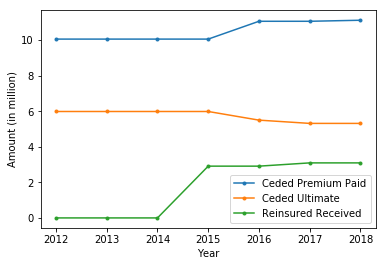

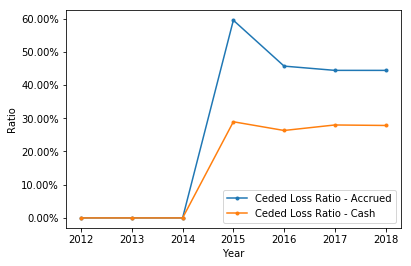

In [34]:
pivot_values = ["Ceded Premium Paid","Rein Received","Ceded Ultimate", "Ceded Loss Ratio - Accrued","Ceded Loss Ratio - Cash"]

# df_filtered=df[(df["Year"]==2018) 
#                & (df["Treaty Year"].isin([2015,2016,2017]))
#                & (df["Contract"]=="Clash")]

# df_filtered=df[(df["Year"].isin([2018,2017,2016,2015]))
#                & (df["Treaty Year"].isin([2009]))
#                & (df["Contract"]=="Clash")]

## ref: https://stackoverflow.com/questions/31617845/how-to-select-rows-in-a-dataframe-between-two-values-in-python-pandas/40442778
# df_filtered=df[(df["Year"].between(2015,2018, inclusive=True))
#                & (df["Treaty Year"].isin(["2009"]))
#                & (df["Contract"]=="Clash")]

# df_filtered=df[df["Treaty Year"].isin(["2009"])]

# df_filtered=df[(df["Treaty Year"].isin(["2009"]))
#                & (df["Contract"]=="Clash")]

df_filtered=df[(df["Year"].between(2012,2018, inclusive=True))
               & (df["Treaty Year"].isin(["2009"]))
               & (df["Contract"]=="Clash")]


df_filtered=df_filtered.set_index('date')

df_filtered.head()
df_filtered.shape

#Plot a dot line graph with y-axis in million 
#- million is with 6 zero
# plt.plot(us.Year, us.Population / 10**6, 'b.')
# plt.plot(japan.Year, japan.Population / 10**6, 'r.')
# plt.legend(['USA Population', 'Japan Population'])
# plt.xlabel('Year')
# plt.ylabel('Population (in million)')
# plt.show()



# df_filtered.plot(y=["Ceded Premium Paid","Ceded Ultimate", "Rein Received"])
# df_filtered.plot(y=["CededPremiumPaid_scaledown","CededUltimate_scaledown", "ReinReceived_scaledown"])

# df_pivot_filtered.resample('D').sum().plot()
# df_filtered.plot(y=["CededPremiumPaid_scaledown","CededUltimate_scaledown", "ReinReceived_scaledown"])
# df_filtered.resample('Y').sum().plot(marker='.',
#                                      x='Year', 
#                                      y=["CededPremiumPaid_scaledown","CededUltimate_scaledown", "ReinReceived_scaledown"])

plot_amounts = df_filtered.resample('Y').sum().plot(marker='.',
                 y=["CededPremiumPaid_scaledown","CededUltimate_scaledown", "ReinReceived_scaledown"])

plot_amounts.legend(['Ceded Premium Paid', 'Ceded Ultimate','Reinsured Received'])
plot_amounts.set_xlabel('Year')
plot_amounts.set_ylabel('Amount (in million)')
# plot_amounts.show()

plot_ratios = df_filtered.resample('Y').sum().plot(marker='.',
                 y=["Ceded Loss Ratio - Accrued","Ceded Loss Ratio - Cash"])
vals = plot_ratios.get_yticks()
plot_ratios.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plot_ratios.set_xlabel('Year')
plot_ratios.set_ylabel('Ratio')
# plot_ratios.show()


# df_filtered.plot(x="date",y=["Ceded Premium Paid","Ceded Ultimate", "Rein Received"])
#df_filtered.plot(x="Year",y=["Ceded Premium Paid","Ceded Ultimate", "Rein Received"])

## pivot on date
## pivot only on filtered data (e.g., TY="2009" and Contract=="Clash")
#df_pivot_filtered = pd.pivot_table(df_filtered,index=['date'],values=pivot_values,aggfunc=np.sum, fill_value=0)

# df_pivot_filtered
# df_pivot_filtered.resample('D').sum().plot()

# df_pivot_filtered.plot(x="date", y=["Ceded Premium Paid","Ceded Ultimate", "Rein Received"])
# df_pivot_filtered.plot(y=["Ceded Premium Paid","Ceded Ultimate", "Rein Received"])


In [11]:
## Reload the dataframe and set date as index 
df_stock_index = pd.read_excel('data/analysis1/Stock_px.xlsx', parse_dates=["DATE"], index_col="DATE")
df_stock_index.head(3)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker
DATE,,,,,,,,,,
2010-01-04,16.40,214.01,14.66,128.32,60.84,29.76,58.10,1132.99,66.16,XYZ Inc.
2010-01-05,15.89,214.38,14.74,126.77,60.14,29.77,58.80,1136.52,66.42,Fidelity
2010-01-06,16.72,210.97,14.66,125.94,60.63,29.58,58.21,1137.14,66.99,TD Bank


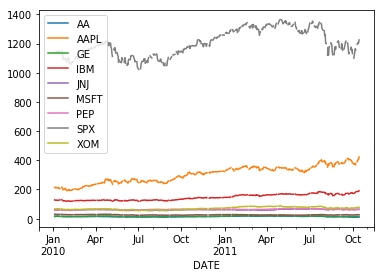

In [12]:
## Now we use the dataframe resample method to create a line graph with multiple series
df_stock_index.resample('D').sum().plot()